In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
import matplotlib.pyplot as plt

In [4]:
os.chdir('d:\\Education\\Extra\\Machine Learning\\Dataset')

In [5]:
df = pd.read_csv('placement.csv',usecols=[1,2,3])

In [6]:
df.shape

(100, 3)

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(['placement'],axis=1),df['placement'],test_size=0.2,random_state=42)

In [10]:
x_train.shape

(80, 2)

In [11]:
df.isnull().sum()

cgpa         0
iq           0
placement    0
dtype: int64

In [12]:
#Model Testing without Column transforemer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [13]:
clf = LinearRegression()
clf2 = DecisionTreeClassifier()

In [14]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)

In [16]:
y_pred

array([ 1.06864245e+00,  1.40498472e+00,  6.17140998e-01,  4.45118051e-01,
        1.00090497e+00,  3.38523624e-04,  8.69533419e-02,  1.61562742e-01,
        4.24502296e-01,  8.00112666e-01, -2.69097971e-01,  1.10405874e+00,
        2.90328864e-02,  5.26599370e-01,  9.50688146e-01,  4.44968060e-01,
        1.21312934e-01,  9.15346851e-01,  2.92504170e-01, -2.97642343e-01])

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [18]:

print("Accuracy LR",accuracy_score(np.round(y_pred),y_test))
print("Accuracy DR",accuracy_score(np.round(y_pred1),y_test))

Accuracy LR 0.85
Accuracy DR 0.9


In [19]:
from sklearn.preprocessing import FunctionTransformer

trf = FunctionTransformer(func = np.log1p)

trf_predict_transformed = trf.fit_transform(x_train)
trf_predict_transformed1 = trf.fit_transform(x_test)

In [20]:
clf = LinearRegression()
clf2 = DecisionTreeClassifier()

clf.fit(trf_predict_transformed,y_train)
clf2.fit(trf_predict_transformed,y_train)

y_pred_function = clf.predict(trf_predict_transformed1)
y_pred_function1 = clf2.predict(trf_predict_transformed1)

In [21]:
print("Accuracy LR",accuracy_score(np.round(y_pred_function),y_test))
print("Accuracy DR",accuracy_score(np.round(y_pred_function1),y_test))

Accuracy LR 0.85
Accuracy DR 0.85


In [22]:
#Column Transformer
from sklearn.compose import ColumnTransformer
#it will apply on the column which you will specify

trf = ColumnTransformer([('log',FunctionTransformer(np.log1p),['cgpa'])],remainder='passthrough')

x_train_transformed2 = trf.fit_transform(X=x_train)
x_test_transformed2 = trf.fit_transform(X=x_test)

In [23]:
clf = LinearRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed2,y_train)
clf2.fit(x_train_transformed2,y_train)

y_pred_column = clf.predict(x_test_transformed2)
y_pred_column1 = clf2.predict(x_test_transformed2)

print("Accuracy LR",accuracy_score(np.round(y_pred_column),y_test))
print("Accuracy DR",accuracy_score(np.round(y_pred_column1),y_test))

Accuracy LR 0.85
Accuracy DR 0.9


In [24]:
import scipy.stats as stats

In [33]:
x_train_transformed2

array([[  2.17475172, 114.        ],
       [  1.68639895, 149.        ],
       [  2.07944154, 199.        ],
       [  2.1517622 ,  89.        ],
       [  2.2512918 , 120.        ],
       [  1.80828877, 176.        ],
       [  1.77495235, 134.        ],
       [  1.68639895,  42.        ],
       [  1.80828877,  66.        ],
       [  2.11625551, 116.        ],
       [  2.06686276, 138.        ],
       [  1.82454929, 161.        ],
       [  1.91692261, 166.        ],
       [  1.82454929,  90.        ],
       [  2.05412373, 112.        ],
       [  2.09186406,  48.        ],
       [  2.06686276,  96.        ],
       [  2.20827441, 166.        ],
       [  2.05412373,  90.        ],
       [  1.82454929, 224.        ],
       [  1.85629799, 135.        ],
       [  1.75785792, 163.        ],
       [  1.79175947,  63.        ],
       [  1.66770682, 200.        ],
       [  1.94591015, 124.        ],
       [  1.82454929, 132.        ],
       [  1.85629799, 107.        ],
 

Text(0.5, 1.0, 'CGPA After Transform')

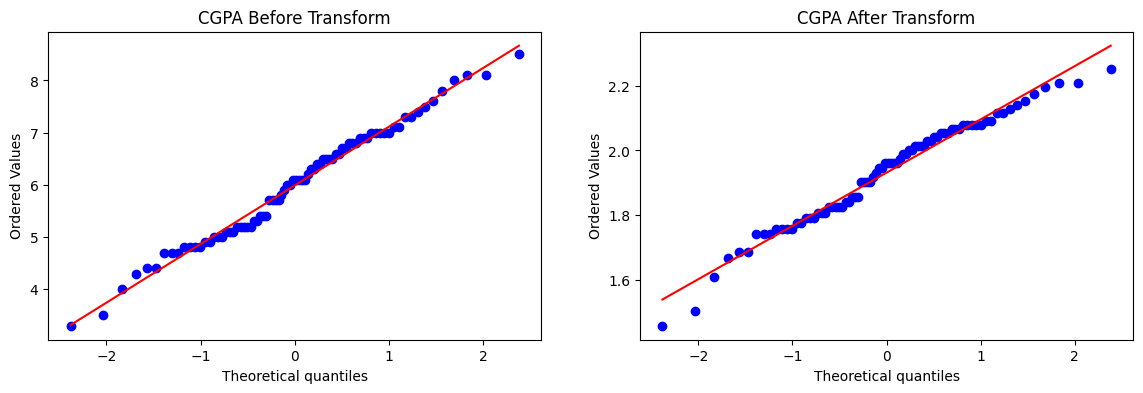

In [35]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['cgpa'], dist="norm", plot=plt)
plt.title('CGPA Before Transform')

plt.subplot(122)
stats.probplot(x_train_transformed2[:,0], dist="norm", plot=plt)
plt.title('CGPA After Transform')

In [ ]:
def apply_transform(transform):
    X = df.iloc[:,0:2]
    y = df.iloc[:,2]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['iq'])],remainder='passthrough')
    
    X_trans = np.round(trf.fit_transform(X))
    
    clf = LinearRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['iq'], dist="norm", plot=plt)
    plt.title('CGPA Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('CGPA After Transform')

    plt.show()

In [38]:
p = 10 
q = 14

x = lambda p = 10,q = 20: (p+q)

In [40]:
x(12,30)

42

c:\Users\axitk\anaconda3\envs\Machinelearning_new\Lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\axitk\anaconda3\envs\Machinelearning_new\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\axitk\anaconda3\envs\Machinelearning_new\Lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\axitk\anaconda3\envs\Machinelearning_new\Lib\site-packages\sklearn\utils\_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\axitk\anaconda3\envs\Machinelearning_new\Lib\site-packages\sk

Accuracy nan


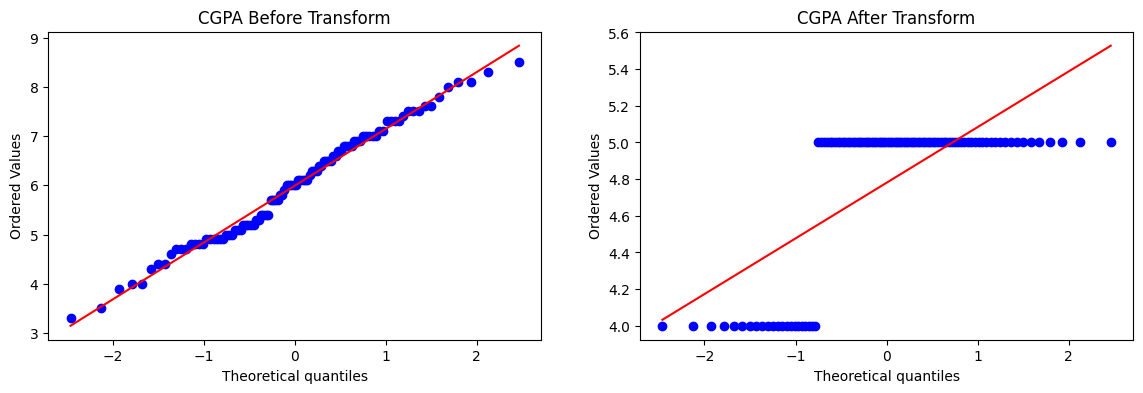

In [30]:
apply_transform(lambda x : np.log(x))